# Fifa 19
Dataset used: [Fifa 19 dataset](https://www.kaggle.com/karangadiya/fifa19)

Target Variable:
- Wage: integer, in thousand €, not null



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import datetime

In [2]:
# Read data from file
df = pd.read_csv("../data/fifa/fifa19_df.csv")
df_small1 = pd.read_csv("../data/fifa/fifa19_dfsmall1.csv")
df_small2 = pd.read_csv("../data/fifa/fifa19_dfsmall2.csv")
pd.set_option('display.max_columns', 500)
# pd.set_option('display.max_rows', 500)
df.head()


,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
4,27,Belgium,91,91,Chelsea,€93M,€340K,2142,Right,4.0,4.0,4.0,High/ Medium,Normal,LF,10.0,"Jul 1, 2012",NaN,2020,5'8,163lbs,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,89+3,66+3,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0


# Clean-up Columns


In [3]:
# clean Value column
df['Value'] = df['Value'].str.replace('€','')
bool_arr_M = df['Value'].str.endswith('M')
bool_arr_K = df['Value'].str.endswith('K')
df['Value'][bool_arr_M] = df['Value'][bool_arr_M].str.replace('M', '')
df['Value'][bool_arr_K] = df['Value'][bool_arr_K].str.replace('K', '')
df['Value'][bool_arr_M] = df['Value'][bool_arr_M].astype('float') * 1000
df['Value'][bool_arr_K] = df['Value'][bool_arr_K].astype('float') * 1
df["Value"] = df["Value"].astype(int)

df_small1["Value"] = df["Value"].astype(int)
df_small2["Value"] = df["Value"].astype(int)


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithC

In [4]:
# # clean Release Clause column
# df['Release Clause'] = df['Release Clause'].str.replace('€','')
# bool_arr_M = df['Release Clause'].str.endswith('M')
# bool_arr_K = df['Release Clause'].str.endswith('K')
# # df['Release Clause'][bool_arr_M] = df['Release Clause'][bool_arr_M].str.replace('M', '')
# # df['Release Clause'][bool_arr_K] = df['Release Clause'][bool_arr_K].str.replace('K', '')
# # df['Release Clause'][bool_arr_M] = df['Release Clause'][bool_arr_M].astype('float') * 1000000
# # df['Release Clause'][bool_arr_K] = df['Release Clause'][bool_arr_K].astype('float') * 1000
# df["Release Clause"]


In [5]:
# clean Wage column
df['Wage'] = df['Wage'].str.replace('€','')
bool_arr_K = df['Wage'].str.endswith('K')
df['Wage'][bool_arr_K] = df['Wage'][bool_arr_K].str.replace('K', '')
df['Wage'][bool_arr_K] = df['Wage'][bool_arr_K].astype('float') * 1
df["Wage"] = df["Wage"].astype(int)

df_small1["Wage"] = df["Wage"].astype(int)
df_small2["Wage"] = df["Wage"].astype(int)


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


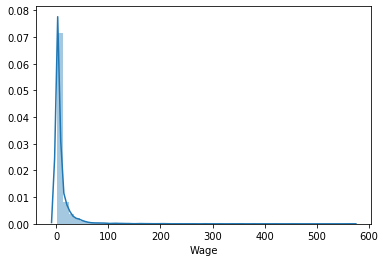

In [6]:
# distribution of target attribute "Wage"
sns.distplot(df.Wage) # kde=0 if kernel density estimation is not necessary
# sns.heatmap(df_small2.corr())


In [7]:
# Dummy Preferred Foot
df['Preferred Foot'] = df['Preferred Foot'].str.lower()
dummies = pd.get_dummies(df['Preferred Foot'], prefix='foot')
df = pd.concat([df, dummies], axis=1)
df = df.drop('Preferred Foot',1)

df_small2['Preferred Foot'] = df_small2['Preferred Foot'].str.lower()
dummies = pd.get_dummies(df_small2['Preferred Foot'], prefix='foot')
df_small2 = pd.concat([df_small2, dummies], axis=1)
df_small2 = df_small2.drop('Preferred Foot',1)


In [8]:
# Dummy Nationality
df['Nationality'] = df['Nationality'].str.lower()
dummies = pd.get_dummies(df['Nationality'], prefix='nationality')
df = pd.concat([df, dummies], axis=1)
df = df.drop('Nationality',1)

df_small2['Nationality'] = df_small2['Nationality'].str.lower()
dummies = pd.get_dummies(df_small2['Nationality'], prefix='nationality')
df_small2 = pd.concat([df_small2, dummies], axis=1)
df_small2 = df_small2.drop('Nationality',1)


In [9]:
# Dummy Club
df['Club'] = df['Club'].str.lower()
dummies = pd.get_dummies(df['Club'], prefix='club')
df = pd.concat([df, dummies], axis=1)
df = df.drop('Club',1)

df_small2['Club'] = df_small2['Club'].str.lower()
dummies = pd.get_dummies(df_small2['Club'], prefix='club')
df_small2 = pd.concat([df_small2, dummies], axis=1)
df_small2 = df_small2.drop('Club',1)


In [10]:
# Split Work Rate + Dummy
split = df['Work Rate'].str.split("/ ")
attack = split.apply(lambda x:x[0])
defense = split.apply(lambda x:x[1])
df = df.drop('Work Rate',1)

df["workrate_attack"] = attack
df["workrate_defense"] = defense

asdf = {
    "workrate_attack": {"Low": 1, "Medium": 2, "High": 3},
    "workrate_defense": {"Low": 1, "Medium": 2, "High": 3}
}

df.replace(asdf, inplace=True)

#-----
split = df_small2['Work Rate'].str.split("/ ")
attack = split.apply(lambda x:x[0])
defense = split.apply(lambda x:x[1])
df_small2 = df_small2.drop('Work Rate',1)

df_small2["workrate_attack"] = attack
df_small2["workrate_defense"] = defense

asdf = {
    "workrate_attack": {"Low": 1, "Medium": 2, "High": 3},
    "workrate_defense": {"Low": 1, "Medium": 2, "High": 3}
}

df_small2.replace(asdf, inplace=True)


In [11]:
# Body Type Dummy
print(df['Body Type'].value_counts())
    
asdf = {"body_type":
 {"Lean": 1, "Normal": 2, "Stocky": 3, 
  "C. Ronaldo": 2, 
  "PLAYER_BODY_TYPE_25": 2, 
  "Messi": 2, 
  "Neymar": 2, 
  "Akinfenwa": 2, 
  "Shaqiri": 2}
}


df['body_type'] = df['Body Type'].copy()

df.replace(asdf, inplace=True)
df = df.drop('Body Type',1)

print(df['body_type'].value_counts())
#-----
print(df_small2['Body Type'].value_counts())
    
asdf = {"body_type":
 {"Lean": 1, "Normal": 2, "Stocky": 3, 
  "C. Ronaldo": 2, 
  "PLAYER_BODY_TYPE_25": 2, 
  "Messi": 2, 
  "Neymar": 2, 
  "Akinfenwa": 2, 
  "Shaqiri": 2}
}


df_small2['body_type'] = df_small2['Body Type'].copy()

df_small2.replace(asdf, inplace=True)
df_small2 = df_small2.drop('Body Type',1)

print(df_small2['body_type'].value_counts())


Normal                 8379
Lean                   5442
Stocky                  924
Shaqiri                   1
Neymar                    1
Messi                     1
Akinfenwa                 1
C. Ronaldo                1
PLAYER_BODY_TYPE_25       1
Name: Body Type, dtype: int64
2    8385
1    5442
3     924
Name: body_type, dtype: int64
Normal                 8379
Lean                   5442
Stocky                  924
Shaqiri                   1
Neymar                    1
Messi                     1
Akinfenwa                 1
C. Ronaldo                1
PLAYER_BODY_TYPE_25       1
Name: Body Type, dtype: int64
2    8385
1    5442
3     924
Name: body_type, dtype: int64


In [12]:
# Position Dummy
df['Position'] = df['Position'].str.lower()
dummies = pd.get_dummies(df['Position'], prefix='position')
df = pd.concat([df, dummies], axis=1)
df = df.drop('Position',1)

df_small1['Position'] = df_small1['Position'].str.lower()
dummies = pd.get_dummies(df_small1['Position'], prefix='position')
df_small1 = pd.concat([df_small1, dummies], axis=1)
df_small1 = df_small1.drop('Position',1)

In [13]:
# Jersey Number Dummy
df['Jersey Number'] = df['Jersey Number'].astype('int')
df['jersey_number'] = ['other' if x > 30 else x for x in df['Jersey Number']]
df = df.drop('Jersey Number',1)

# df["Jersey Number"] = df["Jersey Number"].astype('Int64')

dummies = pd.get_dummies(df['jersey_number'], prefix='jersey')
df = pd.concat([df, dummies], axis=1)
df = df.drop('jersey_number',1)
#-----
df_small2['Jersey Number'] = df_small2['Jersey Number'].astype('int')
df_small2['jersey_number'] = ['other' if x > 30 else x for x in df_small2['Jersey Number']]
df_small2 = df_small2.drop('Jersey Number',1)

# df["Jersey Number"] = df["Jersey Number"].astype('Int64')

dummies = pd.get_dummies(df_small2['jersey_number'], prefix='jersey')
df_small2 = pd.concat([df_small2, dummies], axis=1)
df_small2 = df_small2.drop('jersey_number',1)

In [14]:
# Joined + Contract Valid Until Datetime TODO
df['Joined'] = pd.to_datetime(df['Joined']).dt.year

df['contract_valid_until'] = pd.to_datetime(df['Contract Valid Until']).dt.year
df = df.drop('Contract Valid Until',1)
#-----
df_small2['Joined'] = pd.to_datetime(df_small2['Joined']).dt.year

df_small2['contract_valid_until'] = pd.to_datetime(df_small2['Contract Valid Until']).dt.year
df_small2 = df_small2.drop('Contract Valid Until',1)

In [15]:
# transform Loaned From -> yes/no 
print(df['Loaned From'].isnull().sum())
print(df['Loaned From'].value_counts())
df['Loaned From'] = df['Loaned From'].fillna('None')
df['Loaned From'] = [0 if x == 'None' else 1 for x in df['Loaned From']]
print(df['Loaned From'].value_counts())

print(df_small2['Loaned From'].isnull().sum())
print(df_small2['Loaned From'].value_counts())
df_small2['Loaned From'] = df_small2['Loaned From'].fillna('None')
df_small2['Loaned From'] = [0 if x == 'None' else 1 for x in df_small2['Loaned From']]
print(df_small2['Loaned From'].value_counts())


14751
Series([], Name: Loaned From, dtype: int64)
0    14751
Name: Loaned From, dtype: int64
14751
Series([], Name: Loaned From, dtype: int64)
0    14751
Name: Loaned From, dtype: int64


In [16]:
# Height
def get_inches(height):
    # format: 5'7"    
    ht = height.split("'")
    ft = float(ht[0])
    inch = float(ht[1])
    return (12*ft) + inch


In [17]:
df["Height"][~df["Height"].isnull()] = df["Height"][~df["Height"].isnull()].apply(lambda x:get_inches(str(x)))

heights = df["Height"][~df["Height"].isnull()].astype(int)
median = np.median(heights)
df["Height"][df["Height"].isnull()] = median

df['Height'] = df['Height'].astype(int)

# plt.hist(df["Height"])
# plt.show()
#-----
df_small1["Height"][~df_small1["Height"].isnull()] = df_small1["Height"][~df_small1["Height"].isnull()].apply(lambda x:get_inches(str(x)))

heights = df_small1["Height"][~df_small1["Height"].isnull()].astype(int)
median = np.median(heights)
df_small1["Height"][df_small1["Height"].isnull()] = median

df_small1['Height'] = df_small1['Height'].astype(int)


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
c:\program files\pytho

In [18]:
# Weight
df['Weight'] = df['Weight'].str.replace('lbs','')

weights = df["Weight"][~df["Weight"].isnull()].astype(int)
median = np.median(weights)
df["Weight"][df["Weight"].isnull()] = median

df['Weight'] = df['Weight'].astype(int)

# plt.hist(df["Weight"][~df["Weight"].isnull()].astype(int))
# plt.show()
#-----
df_small1['Weight'] = df_small1['Weight'].str.replace('lbs','')

weights = df_small1["Weight"][~df_small1["Weight"].isnull()].astype(int)
median = np.median(weights)
df_small1["Weight"][df_small1["Weight"].isnull()] = median

df_small1['Weight'] = df_small1['Weight'].astype(int)


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [19]:
# calculate statistics
def calculate_statistics(df):
    df["LS"] = df["LS"].apply(lambda x:eval(x))
    df["ST"] = df["ST"].apply(lambda x:eval(x))
    df["RS"] = df["RS"].apply(lambda x:eval(x))
    df["LW"] = df["LW"].apply(lambda x:eval(x))
    df["LF"] = df["LF"].apply(lambda x:eval(x))
    df["CF"] = df["CF"].apply(lambda x:eval(x))
    df["RF"] = df["RF"].apply(lambda x:eval(x))
    df["RW"] = df["RW"].apply(lambda x:eval(x))
    df["LAM"] = df["LAM"].apply(lambda x:eval(x))
    df["CAM"] = df["CAM"].apply(lambda x:eval(x))
    df["RAM"] = df["RAM"].apply(lambda x:eval(x))
    df["LM"] = df["LM"].apply(lambda x:eval(x))
    df["LCM"] = df["LCM"].apply(lambda x:eval(x))
    df["CM"] = df["CM"].apply(lambda x:eval(x))
    df["RCM"] = df["RCM"].apply(lambda x:eval(x))
    df["RM"] = df["RM"].apply(lambda x:eval(x))
    df["LWB"] = df["LWB"].apply(lambda x:eval(x))
    df["LDM"] = df["LDM"].apply(lambda x:eval(x))
    df["CDM"] = df["CDM"].apply(lambda x:eval(x))
    df["RDM"] = df["RDM"].apply(lambda x:eval(x))
    df["RWB"] = df["RWB"].apply(lambda x:eval(x))
    df["LB"] = df["LB"].apply(lambda x:eval(x))
    df["LCB"] = df["LCB"].apply(lambda x:eval(x))
    df["CB"] = df["CB"].apply(lambda x:eval(x))
    df["RCB"] = df["RCB"].apply(lambda x:eval(x))
    df["RB"] = df["RB"].apply(lambda x:eval(x))
    

In [20]:
calculate_statistics(df)
calculate_statistics(df_small1)


In [21]:
df.head()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Joined,Loaned From,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,foot_left,foot_right,nationality_afghanistan,nationality_albania,nationality_algeria,nationality_andorra,nationality_angola,nationality_antigua & barbuda,nationality_argentina,nationality_armenia,nationality_australia,nationality_austria,nationality_azerbaijan,nationality_barbados,nationality_belarus,nationality_belgium,nationality_belize,nationality_benin,nationality_bermuda,nationality_bolivia,nationality_bosnia herzegovina,nationality_botswana,nationality_brazil,nationality_bulgaria,nationality_burkina faso,nationality_burundi,nationality_cameroon,nationality_canada,nationality_cape verde,nationality_central african rep.,nationality_chad,nationality_chile,nationality_china pr,nationality_colombia,nationality_comoros,nationality_congo,nationality_costa rica,nationality_croatia,nationality_cuba,nationality_curacao,nationality_cyprus,nationality_czech republic,nationality_denmark,nationality_dominican republic,nationality_dr congo,nationality_ecuador,nationality_egypt,nationality_el salvador,nationality_england,nationality_equatorial guinea,nationality_eritrea,nationality_estonia,nationality_ethiopia,nationality_faroe islands,nationality_fiji,nationality_finland,nationality_france,nationality_fyr macedonia,nationality_gabon,nationality_gambia,nationality_georgia,nationality_germany,nationality_ghana,nationality_greece,nationality_grenada,nationality_guam,nationality_guatemala,nationality_guinea,nationality_guinea bissau,nationality_guyana,nationality_haiti,nationality_honduras,nationality_hong kong,nationality_hungary,nationality_iceland,nationality_indonesia,nationality_iran,nationality_iraq,nationality_israel,nationality_italy,nationality_ivory coast,nationality_jamaica,nationality_japan,nationality_jordan,nationality_kazakhstan,nationality_kenya,nationality_korea dpr,nationality_korea republic,nationality_kosovo,nationality_kuwait,nationality_latvia,nationality_lebanon,nationality_liberia,nationality_libya,nationality_liechtenstein,nationality_lithuania,nationality_luxembourg,nationality_madagascar,nationality_mali,nationality_mauritania,nationality_mauritius,nationality_mexico,nationality_moldova,nationality_montenegro,nationality_montserrat,nationality_morocco,nationality_mozambique,nationality_namibia,nationality_netherlands,nationality_new caledonia,nationality_new zealand,nationality_nicaragua,nationality_niger,nationality_nigeria,nationality_northern ireland,nationality_norway,nationality_palestine,nationality_panama,nationality_paraguay,nationality_peru,nationality_philippines,nationality_poland,nationality_portugal,nationality_puerto rico,nationality_qatar,nationality_republic of ireland,nationality_romania,nationality_russia,nationality_rwanda,nationality_saudi arabia,nationality_scotland,nationality_senegal,nationality_serbia,nationality_sierra leone,nationality_slovakia,nationality_slovenia,nationality_south africa,nationality_south sudan,nationality_spain,nationality_st kitts nevis,nationality_sudan,nationality_suriname,nationality_sweden,nationality_switzerland,nationality_syria,nationality_são tomé & príncipe,nationality_tanzania,nationality_thailand,nationality_togo,nationality_trinidad & tobago,nationality_tunisia,nationality_turkey,nationality_uganda,nationality_ukraine,nationality_united arab emirates,nationality_united states,nationality_uruguay,nationality_uzbekistan,nationality_venezuela,nationality_wales,nationality_zambia,nationality_zimbabw

In [22]:
# missing values
ls = df.isnull().sum()
ls[ls!=0]

Series([], dtype: int64)

In [23]:
# all int/float values - and 1 datetime
types = df.dtypes
types = types[~types.astype("str").str.contains("int")]
types = types[~types.astype("str").str.contains("float")]
types


Series([], dtype: object)

In [24]:
df.to_csv('../data/fifa/fifa19_df_cleaned.csv', index=False)
df_small1.to_csv('../data/fifa/fifa19_dfsmall1_cleaned.csv', index=False)
df_small2.to_csv('../data/fifa/fifa19_dfsmall2_cleaned.csv', index=False)